# Análisis de Mercado para un Café Robotizado en Los Ángeles

# Introducción
He decidido emprender un innovador proyecto, abrir un pequeño café atendido por robots en la ciudad de Los Ángeles, este concepto futurista tiene un gran potencial, pero también requiere una inversión significativa. Para atraer a posibles inversionistas, es esencial demostrar un conocimiento profundo del mercado actual y prever la sostenibilidad del negocio una vez que la novedad de los camareros robot desaparezca.

Como experto en análisis de datos, voy a preparar un estudio de mercado utilizando datos abiertos sobre restaurantes en Los Ángeles. Este análisis permitirá comprender las tendencias del mercado, identificar oportunidades y formular recomendaciones estratégicas para asegurar el éxito a largo plazo del café robotizado.

# Objetivos del Proyecto
1. Preparación de Datos: Descargar y limpiar el conjunto de datos de restaurantes en Los Ángeles.
2. Análisis de Datos: Realizar un análisis exhaustivo para entender las dinámicas del mercado. Crear gráficos informativos que respalden los hallazgos.
3. Presentación de Resultados: Elaborar una presentación profesional para inversores.

# Herramientas y Librerías de Python
- Pandas: Para la manipulación y análisis de datos.
- NumPy: Para operaciones numéricas eficientes.
- Matplotlib y Seaborn: Para la creación de visualizaciones.
- Jupyter Notebook: Para documentar y presentar el análisis de manera interactiva.

## Paso: Descargar y Preparar los Datos 

In [1]:
# Inicialización
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos
data = pd.read_csv('/datasets/rest_data_us_upd.csv')

# Verificar la información
data.info()
display(data.head())
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


0

# Observaciones para la muestra de datos 

La mayoría de las columnas están completas, con 9651 entradas. Sin embargo, la columna chain tiene 3 valores nulos (9651 registros en total, 9648 no nulos), lo que representa una pequeña porción del dataset, el dataset no contiene datos dúplicados.

Las columnas tienen tipos de datos coherentes (int64 para identificadores y número de asientos, object para nombres, direcciones, y categorías). Esto sugiere que los datos están bien preparados para análisis posteriores.

Los valores nulos en la columna chain deben ser tratados antes de realizar análisis específicos sobre la pertenencia a cadenas. Se pueden eliminar estos registros, imputarlos si es posible, o clasificarlos como "desconocidos" según el contexto y la importancia de esta variable en el análisis.

La columna number (que representa el número de asientos) es completa, lo que permite un análisis confiable sobre la capacidad de los establecimientos.
La columna object_type está completamente rellena, lo que es crucial para analizar la distribución y características de los diferentes tipos de establecimientos.

Dado que el dataset contiene información esencial como el tipo de establecimiento (object_type), la capacidad (number), y la pertenencia a una cadena (chain), es posible realizar análisis detallados sobre las tendencias del mercado, características de los restaurantes de cadena versus independientes, y la distribución geográfica de los establecimientos en Los Ángeles.

# Recomendaciones Iniciales

Es necesario abordar los valores nulos en la columna chain antes de realizar análisis que involucren esta variable. Dependiendo del análisis, podriamos optar por eliminar esos registros, imputar los valores faltantes o categorizarlos como "desconocidos".

Una vez tratados los valores nulos, el siguiente paso sería explorar cómo la variable chain afecta otras métricas como el número de asientos y la ubicación geográfica de los restaurantes.

Dado que la columna address está completa, es posible realizar un análisis geoespacial para entender mejor la distribución de restaurantes en Los Ángeles, lo que podría ser crucial para la estrategia de localización del nuevo café.
Preparación para la Presentación:

Estos datos parecen estar en una condición adecuada para la creación de visualizaciones y análisis adicionales, lo que permitirá presentar un informe detallado y visualmente convincente a los inversionistas. Estos hallazgos sugieren que el dataset es lo suficientemente robusto para proceder con un análisis más profundo, permitiendo identificar tendencias clave que podrían influir en las decisiones estratégicas para el desarrollo del café robotizado.

In [3]:
# Manejo de valores Ausentes y Duplicados
data['chain'].fillna('Unknown', inplace=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


## Paso: Análisis de Datos

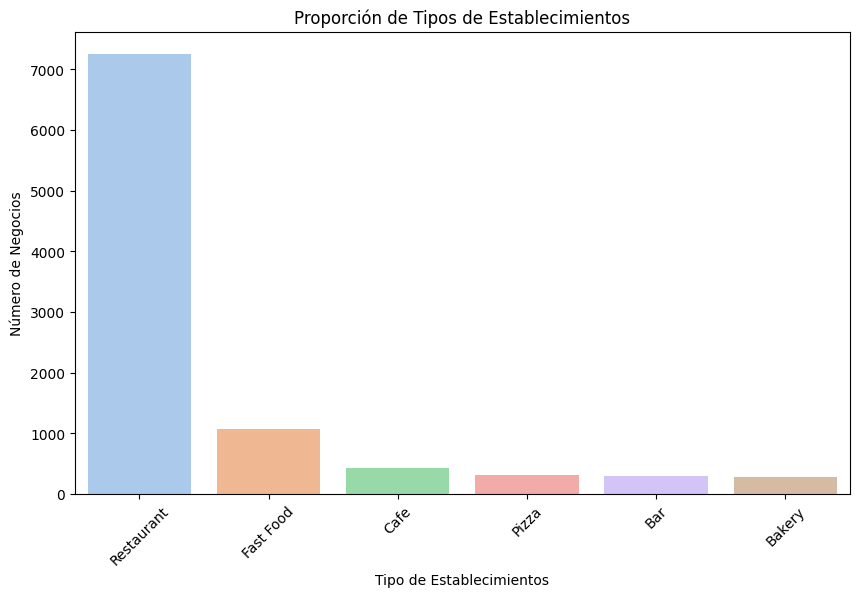

In [4]:
# Proporciones de Tipos de Establecimientos
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='object_type', order=data['object_type'].value_counts().index, palette='pastel')
plt.xticks(rotation=45)
plt.title('Proporción de Tipos de Establecimientos')
plt.xlabel('Tipo de Establecimientos')
plt.ylabel('Número de Negocios')
plt.show()

# Proporción de Tipos de Establecimientos

Los restaurantes constituyen la mayoría de los establecimientos en Los Ángeles, con más de 7000 registros, seguido por fast food con aproximadamente 1000. Este dominio sugiere que el mercado está altamente enfocado en los restaurantes convencionales, otros tipos de establecimientos como cafeterías, pizzerías, bares y panaderías tienen una presencia mucho menor. Esto indica que, aunque hay diversidad en los tipos de establecimientos, la mayoría de la oferta se concentra en restaurantes.

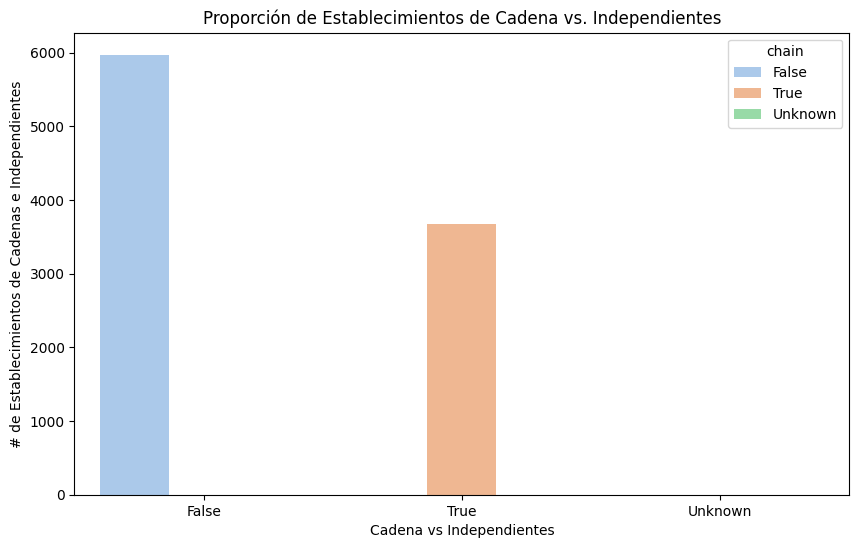

In [5]:
# Proporciones de Establecimientos de Cadena vs. Independientes
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='chain', hue='chain', palette='pastel')
plt.title('Proporción de Establecimientos de Cadena vs. Independientes')
plt.xlabel('Cadena vs Independientes')
plt.ylabel('# de Establecimientos de Cadenas e Independientes')
plt.show()

# Proporción de Establecimientos de Cadena vs. Independientes

La mayoría de los establecimientos no pertenecen a cadenas, con más de 6000 registros, mientras que los establecimientos que sí pertenecen a una cadena representan una proporción significativa pero menor, con alrededor de 3500 registros. Dado que los establecimientos independientes son más comunes, el nuevo café robotizado podría necesitar destacar por su singularidad o innovaciones adicionales para competir en este mercado saturado de opciones no pertenecientes a cadenas.

Bakery        1.000000
Cafe          0.611494
Fast Food     0.567542
Pizza         0.478125
Restaurant    0.315920
Bar           0.263699
Name: object_type, dtype: float64

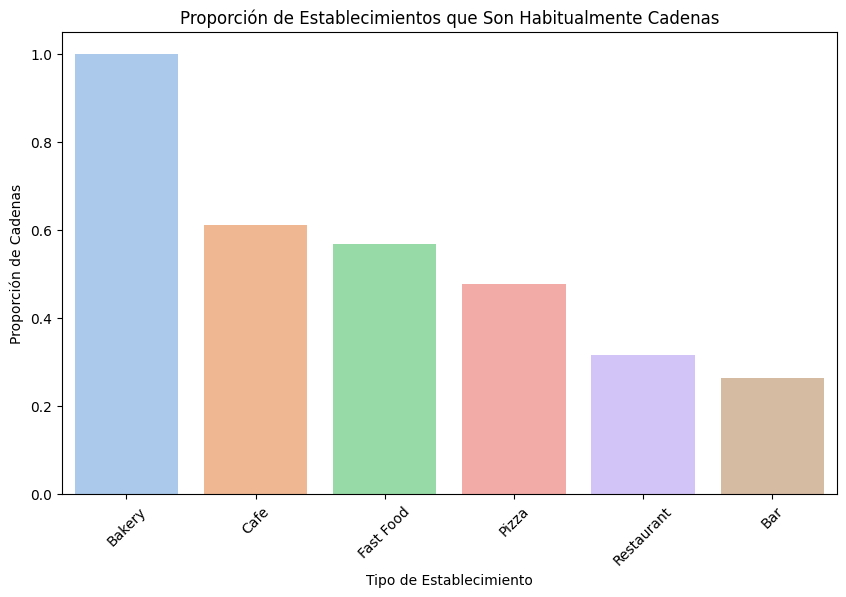

In [6]:
# Total de establecimientos por tipo
total_types = data['object_type'].value_counts()

# Total de cadenas por tipo de establecimiento
chain_types = data[data['chain'] == True]['object_type'].value_counts()

# Calcular la proporción de cadenas dentro de cada tipo de establecimiento
proportion_chains = (chain_types / total_types).sort_values(ascending=False)

# Mostrar las proporciones calculadas
display(proportion_chains)

# Graficar las proporciones
plt.figure(figsize=(10, 6))
sns.barplot(x=proportion_chains.index, y=proportion_chains.values, palette='pastel')
plt.xticks(rotation=45)
plt.title('Proporción de Establecimientos que Son Habitualmente Cadenas')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Proporción de Cadenas')
plt.show()

# Distribución de tipos de establecimientos que son habitualmente cadenas

Las panaderías (Bakery) tienen la mayor proporción de cadenas, prácticamente el 100%. Esto sugiere que este tipo de establecimiento es muy propenso a ser parte de una cadena. Las cadenas de panaderías parecen ser dominantes en el mercado.

Los cafés (Café) tienen una alta proporción de cadenas, superior al 60%. Esto indica que los cafés también son comúnmente operados como cadenas, lo cual es consistente con la presencia de muchas franquicias populares de café.

Los establecimientos de comida rápida (Fast Food) también muestran una alta tendencia a ser cadenas, con una proporción cercana al 60%. Esto es esperable, dado que la comida rápida suele estar dominada por grandes cadenas multinacionales.

Las pizzerías (Pizza) tienen una proporción de cadenas cercana al 50%. Esto muestra que aunque las pizzerías son frecuentemente parte de cadenas, todavía existe una significativa presencia de pizzerías independientes.

Los restaurantes (Restaurant) tienen una proporción más baja de cadenas, por debajo del 40%. Esto sugiere que, aunque hay cadenas de restaurantes, una gran parte del mercado está constituida por restaurantes independientes.

Los bares (Bar) tienen la proporción más baja de cadenas, cercana al 30%. Esto indica que la mayoría de los bares son independientes y no forman parte de cadenas, lo que puede estar relacionado con la naturaleza más personalizada y local de estos negocios.

Los resultados muestran que ciertos tipos de establecimientos, como las panaderías, cafés, y locales de comida rápida, son más propensos a operar como cadenas. En cambio, restaurantes y bares tienden a ser más independientes. Estos hallazgos son importantes para entender las dinámicas de mercado y pueden ayudar en la toma de decisiones sobre la viabilidad de convertir un tipo específico de negocio en una cadena.

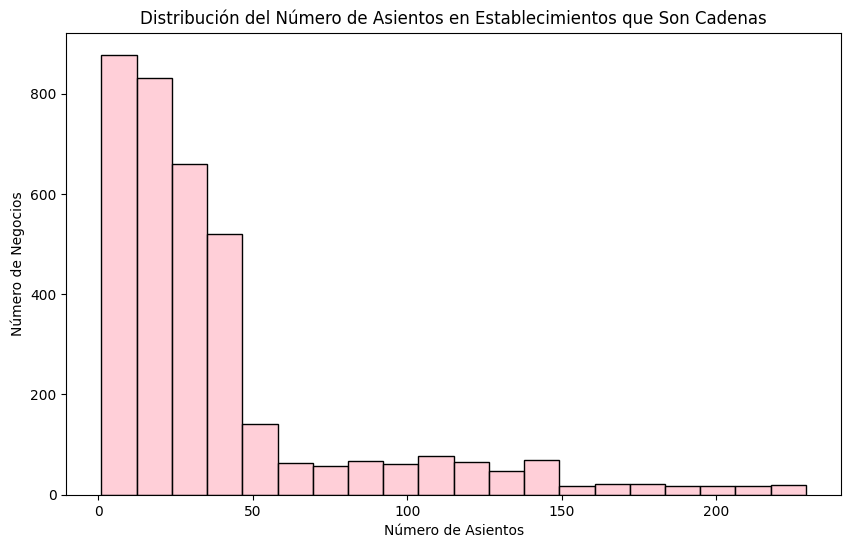

In [7]:
# Filtrar solo los establecimientos que son cadenas
chain_data = data[data['chain'] == True]

# Graficar la distribución del número de asientos en las cadenas
plt.figure(figsize=(10, 6))
sns.histplot(chain_data['number'], bins=20, color='pink')
plt.title('Distribución del Número de Asientos en Establecimientos que Son Cadenas')
plt.xlabel('Número de Asientos')
plt.ylabel('Número de Negocios')
plt.show()

# Distribución del número de asientos en establecimientos que son cadenas. 

La mayoría de las cadenas tienen un número reducido de asientos, esto es evidente por la alta frecuencia en las primeras barras, que representan establecimientos con menos de 50 asientos.

A medida que aumenta el número de asientos, la frecuencia de cadenas disminuye considerablemente, existen pocas cadenas que tienen más de 100 asientos, lo que indica que la mayoría de las cadenas son relativamente pequeñas en términos de capacidad.

La mayor concentración se encuentra en el rango de 0 a 50 asientos, lo que sugiere que las cadenas tienden a operar en espacios más reducidos, posiblemente para mantener una operación más eficiente y reducir costos. Hay una muy baja frecuencia de establecimientos con más de 100 asientos, indicando que las cadenas más grandes son una minoría.

En resumen, este gráfico sugiere que las cadenas de establecimientos tienden a ser pequeñas en términos de capacidad, con una tendencia significativa hacia un número limitado de asientos. Esto podría ser un factor a considerar si se está evaluando la apertura de un nuevo establecimiento bajo un modelo de cadena, donde la capacidad puede estar alineada con estos patrones de menor tamaño.

object_type
Restaurant    48.042316
Bar           44.767123
Fast Food     31.837711
Pizza         28.459375
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64

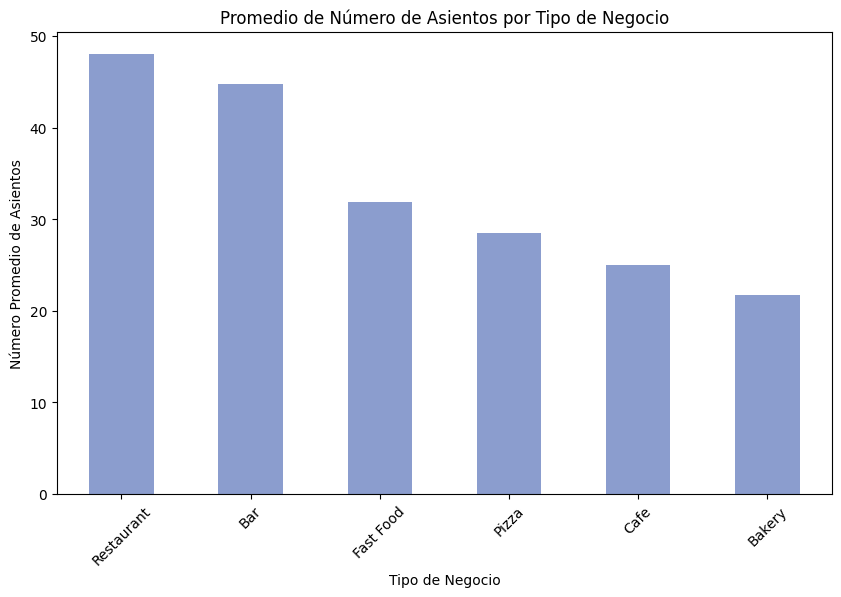

In [8]:
# Promedio de Número de Asientos por Tipo de Restaurante
avg_seats = data.groupby('object_type')['number'].mean().sort_values(ascending=False)
display(avg_seats)

avg_seats.plot(kind='bar', figsize=(10,6), color='#8b9dce')
plt.title('Promedio de Número de Asientos por Tipo de Negocio')
plt.xlabel('Tipo de Negocio')
plt.ylabel('Número Promedio de Asientos')
plt.xticks(rotation=45)
plt.show()

# Promedio de Número de Asientos por Tipo de Restaurante

Los restaurantes y bares tienden a tener un mayor promedio de asientos en comparación con otros tipos de establecimientos como fast food, pizzerías, cafés y panaderías, esto sugiere que los restaurantes y bares están diseñados para acomodar a un mayor número de personas, probablemente debido a la naturaleza de su servicio que suele incluir comidas más largas y eventos sociales.

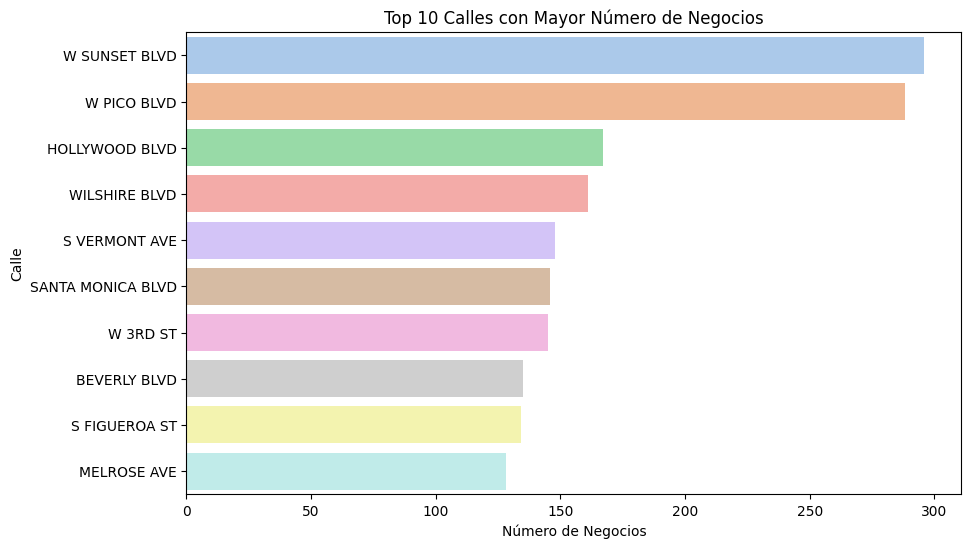

In [9]:
# Extracción de Nombres de Calles quitando solo los números iniciales
data['street'] = data['address'].apply(lambda x: ' '.join(x.split()[1:]))

# Top 10 Calles con Mayor Número de Restaurantes
top_streets = data['street'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_streets.values, y=top_streets.index, palette='pastel')
plt.title('Top 10 Calles con Mayor Número de Negocios')
plt.xlabel('Número de Negocios')
plt.ylabel('Calle')
plt.show()

# Top 10 Calles con Mayor Número de Negocios

El gráfico muestra que las calles principales de Los Ángeles, como "W SUNSET BLVD", "W PICO BLVD", y "HOLLYWOOD BLVD", tienen la mayor concentración de negocios, esto sugiere que estas calles son zonas comerciales clave en la ciudad.

La mayoría de las calles en el gráfico son bulevares ("BLVD"), lo que indica que estos tipos de vías son preferidas para la ubicación de negocios en Los Ángeles. Bulevares como "SUNSET BLVD" y "WILSHIRE BLVD" son reconocidos no solo por su tamaño, sino también por su importancia comercial.

La lista incluye calles que están dispersas en diferentes partes de la ciudad, lo que refleja que no hay una única zona comercial dominante, sino que la actividad económica está bien distribuida por diferentes áreas. Las calles con un alto número de negocios son áreas de alto tráfico y, por lo tanto, tienen un gran potencial de mercado, esto también podría significar una alta competencia, lo que es un factor clave a considerar para cualquier nuevo negocio que desee establecerse en estas ubicaciones.

Para un negocio que planea entrar en el mercado, es esencial considerar tanto la oportunidad que ofrecen estas calles como la posible saturación del mercado. Es importante evaluar la demanda y la competencia al seleccionar una ubicación.
Este gráfico proporciona una visión clara de cuáles son las zonas más comerciales en Los Ángeles y puede ser una herramienta valiosa para decisiones estratégicas de ubicación de nuevos negocios.

In [10]:
# Número de Calles con Solo un Restaurante
single_restaurants = data['street'].value_counts().value_counts().get(1, 0)
print(f'Número de calles con solo un restaurante: {single_restaurants}')

Número de calles con solo un restaurante: 2445


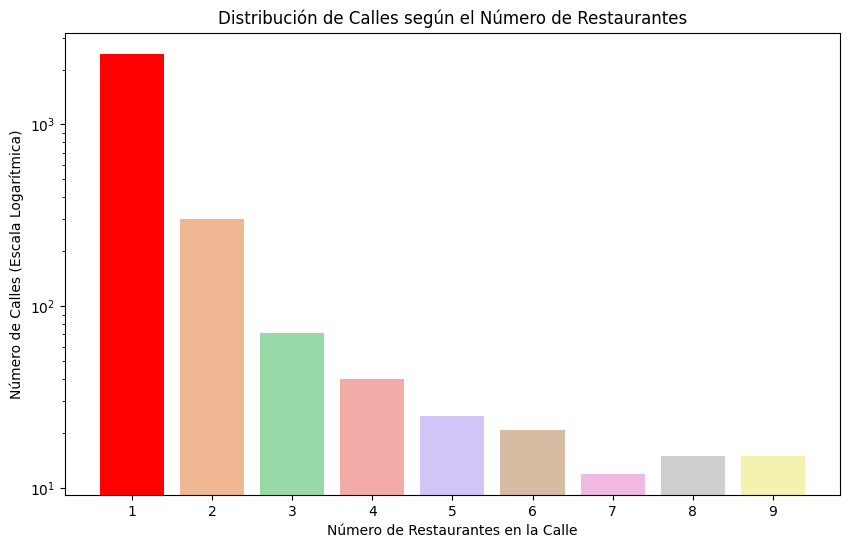

In [11]:
# Contar el número de restaurantes por calle
restaurant_counts = data['street'].value_counts()

# Filtrar las calles con menos de 10 restaurantes
streets_with_less_restaurants = restaurant_counts[restaurant_counts < 10]

# Contar cuántas calles tienen un número específico de restaurantes
streets_with_restaurants = streets_with_less_restaurants.value_counts().sort_index()

# Graficar la distribución
plt.figure(figsize=(10, 6))
sns.barplot(x=streets_with_restaurants.index, y=streets_with_restaurants.values, palette='pastel')
plt.yscale('log')  # Aplicar escala logarítmica en el eje Y

# Resaltar la barra que corresponde a calles con exactamente un restaurante
for index, value in enumerate(streets_with_restaurants.index):
    if value == 1:
        plt.bar(index, streets_with_restaurants[value], color='red')

plt.title('Distribución de Calles según el Número de Restaurantes')
plt.xlabel('Número de Restaurantes en la Calle')
plt.ylabel('Número de Calles (Escala Logarítmica)')
plt.show()

#  Distribución de Calles según el Número de Restaurantes

Este gráfico muestra la distribución del número de calles según la cantidad de restaurantes que tienen, aplicando una escala logarítmica en el eje Y para mejorar la visibilidad de las diferencias entre categorías.

La gran mayoría de las calles tienen un único restaurante, como se destaca en la barra roja, esto indica que es muy común que los restaurantes estén distribuidos de manera dispersa, sin que muchas calles acumulen una gran cantidad de restaurantes.

A medida que aumenta el número de restaurantes en una calle, el número de calles que cumplen con ese criterio disminuye drásticamente. Muy pocas calles tienen más de tres o cuatro restaurantes.

El número de calles con dos o más restaurantes es significativamente menor. Esto puede indicar que en esas calles, la competencia es más intensa, y probablemente sea más difícil atraer clientes adicionales sin una propuesta de valor clara y diferenciada.

Las calles con un solo restaurante representan una oportunidad potencial para nuevos negocios que busquen establecerse en áreas con menos competencia directa, esto puede ser especialmente valioso para un concepto de restaurante innovador, como un café robotizado.

En las pocas calles que tienen más de dos restaurantes, puede haber un mayor riesgo de saturación del mercado, lo que podría dificultar la entrada y el éxito de nuevos restaurantes sin una diferenciación clara. Abrir en una calle con un solo restaurante podría ser ventajoso, ya que se aprovecharía de la baja competencia local. Sin embargo, esto también depende de la afluencia de personas y la demanda en esa área específica.

Dado que el café robotizado es una innovación, podría atraer a clientes curiosos incluso en calles con varios restaurantes. Sin embargo, para asegurar la sostenibilidad, el negocio debería continuar ofreciendo experiencias únicas o expandirse a ubicaciones adicionales una vez que la novedad inicial disminuya.

# En resumen

El gráfico respalda la idea de considerar calles con baja competencia para la apertura de un nuevo establecimiento, y sugiere que una estrategia diferenciada será clave para el éxito a largo plazo, especialmente si se considera una futura expansión a otras calles o la creación de una cadena.

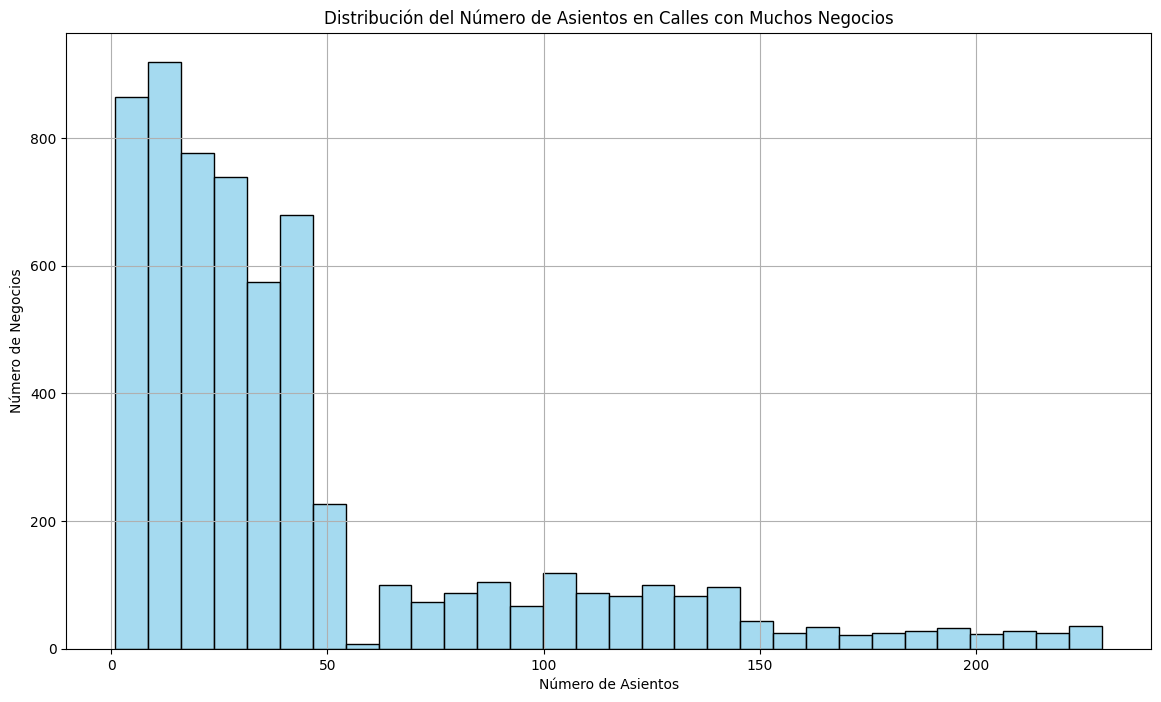

In [12]:
# Distribución del Número de Asientos en Calles con Muchos Negocios

# Crear una nueva columna con el numero de restaurantes en cada calle
data['num_restaurants'] = data['street'].map(restaurant_counts)

# Identificar las calles con más restaurantes que el umbral
high_rest_streets = data['street'].value_counts()[data['street'].value_counts() > 5].index

# Filtrar los datos para incluir solo las calles con muchos restaurantes
subset = data[data['street'].isin(high_rest_streets)]

# Crear el histograma
plt.figure(figsize=(14,8))
sns.histplot(data=subset, x='number', bins=30, color='skyblue')
plt.title('Distribución del Número de Asientos en Calles con Muchos Negocios')
plt.xlabel('Número de Asientos')
plt.ylabel('Número de Negocios')
plt.grid(True)
plt.show()

# Distribución del Número de Asientos en Calles con Muchos Restaurantes:

La mayoría de los negocios en calles concurridas tienen un número relativamente bajo de asientos, con un pico en la franja de 0 a 50 asientos. Esto sugiere que, incluso en calles con muchos negocios, los establecimientos tienden a ser pequeños en términos de capacidad de asientos.

A medida que aumenta el número de asientos, la cantidad de negocios disminuye significativamente, aunque todavía hay algunos negocios con un gran número de asientos, incluso superando los 200 asientos. Esto puede indicar la presencia de algunos establecimientos más grandes o incluso cadenas de restaurantes en estas calles.

Las calles con muchos negocios pero con baja capacidad de asientos podrían presentar oportunidades para la introducción de restaurantes más grandes, dependiendo de la demanda local. Alternativamente, esto puede reflejar un mercado ya saturado donde los espacios más pequeños son la norma debido a limitaciones físicas o alta competencia.

La dispersión en el número de asientos también sugiere que existe una variedad significativa en el tipo de negocios presentes en estas calles, desde pequeños cafés o fast food con pocos asientos hasta restaurantes más grandes que pueden albergar a muchas personas.

Este análisis puede ayudar a comprender mejor la capacidad y la competencia en áreas específicas, lo cual es valioso para el desarrollo comercial y la planificación urbana.


# En resumen

En las calles con más restaurantes, la mayoría de los establecimientos tienden a tener entre 6 y 11 restaurantes, con un rango amplio en el número de asientos, que puede ir desde menos de 20 hasta más de 200, no parece haber una correlación clara entre el número de restaurantes en una calle y el número de asientos por restaurante, algunas calles tienen restaurantes con una amplia capacidad mientras que otras tienen más restaurantes pero con menor capacidad por local.

# Conclusiones Finales y Recomendaciones 

Dado que los restaurantes son abrumadoramente dominantes en Los Ángeles y que la mayoría son independientes, el café robotizado debe buscar diferenciarse no solo por la tecnología empleada, sino también por otros factores como la experiencia del cliente, la ubicación y la oferta de productos únicos.

Las calles con un gran número de restaurantes suelen ser áreas de alta concentración comercial, donde la competencia es intensa pero también existe un gran flujo de clientes. Estas áreas son atractivas para la apertura de nuevos restaurantes, ya que la alta densidad de restaurantes indica una fuerte demanda. 

Las calles con más restaurantes muestran una gran diversidad en términos de capacidad de asientos, esto sugiere que estas áreas probablemente atraen a una amplia variedad de clientes, desde aquellos que buscan una experiencia rápida y casual hasta quienes prefieren un ambiente más formal y con capacidad para grupos grandes, lo que sugiere que estos tipos de establecimientos están optimizados para atender a grandes grupos o a una alta rotación de clientes. Esto podría estar relacionado con la necesidad de generar mayores ingresos a través del volumen de ventas.

Las calles con un gran número de restaurantes probablemente estén ubicadas en zonas comerciales densas o cerca de instituciones grandes (como universidades). Esto puede estar relacionado con la necesidad de ofrecer una variedad de opciones para diferentes preferencias y presupuestos. Los restaurantes y bares parecen estar estratégicamente diseñados para maximizar el número de clientes al tener más asientos disponibles, lo cual puede ser una ventaja competitiva en zonas donde la competencia es alta.

Fast Food y Pizzerías son establecimientos que tienden a tener menos asientos en promedio, lo que es consistente con su modelo de negocio de alta rotación y tiempos de permanencia más cortos. Mientras Cafés y Panaderías tienen la menor cantidad de asientos, lo cual es coherente con su enfoque en un servicio más casual y rápido.

Incluso en las calles con muchos restaurantes, hay una gran variabilidad en el número de asientos por establecimiento, esto indica que no hay una "talla única" cuando se trata de la capacidad de los restaurantes en áreas concurridas, diferentes modelos de negocio pueden coexistir y prosperar en la misma área.


# Recomendaciones:

- Restaurantes o Bares: Si el objetivo es maximizar la capacidad de asientos para generar altos ingresos a través de grupos grandes y alta rotación, los restaurantes y bares son opciones óptimas. Considerar la apertura de un restaurante con un enfoque en cenas formales, eventos sociales o entretenimiento puede ser rentable en estas áreas densamente pobladas.

- Fast Food y Pizzerías: Para capturar el mercado de clientes que buscan una opción rápida y accesible, abrir un establecimiento de fast food o una pizzería con un enfoque en el servicio rápido y opciones para llevar podría ser una estrategia efectiva. Aquí, menos asientos pueden ser compensados con una alta rotación de clientes.

Dependiendo del tipo de restaurante, es importante optimizar el número de asientos para maximizar la rentabilidad sin sacrificar la comodidad del cliente. Por ejemplo, un bar o restaurante puede necesitar más asientos para grandes grupos, mientras que un café puede centrarse en una experiencia más íntima y acogedora.

Considerar la variabilidad en el número de asientos para adaptarse a diferentes tipos de clientes, esto podría significar tener una combinación de mesas grandes y pequeñas para diferentes necesidades.

Dado que las áreas con alta densidad de restaurantes soportan múltiples modelos de negocio, existe una buena oportunidad para desarrollar una cadena de restaurantes. Una cadena podría beneficiarse al segmentar sus establecimientos según el tipo de cliente y la hora del día. Por ejemplo, una marca podría abrir diferentes tipos de restaurantes bajo el mismo nombre (un bar de noche, un café durante el día) para capturar diferentes segmentos del mercado en la misma área.

Aunque los establecimientos de cadenas tienen una presencia significativa, no dominan el mercado, esto sugiere que hay espacio para la expansión de una nueva cadena, especialmente si el café robotizado puede ofrecer una propuesta de valor convincente y única en comparación con los negocios existentes. Al desarrollar una cadena, es crucial estandarizar la calidad y la experiencia del cliente mientras se mantiene la flexibilidad para adaptar el tamaño y el diseño según la ubicación específica. Identificar y expandirse en calles similares a las que muestran alta densidad de negocios en los datos. Estas ubicaciones probablemente tienen un alto tráfico de clientes y son ideales para establecer nuevas sucursales.

Dependiendo del área, ajustar el modelo de negocio. En áreas con mayor competencia, puede ser necesario diferenciarse mediante un servicio más especializado o una propuesta única de valor (como un menú exclusivo o un concepto de diseño distintivo), dado que tanto los establecimientos de cadenas como los independientes tienen una distribución similar en términos de asientos, se recomienda que el café mantenga un tamaño moderado que maximice la eficiencia operativa sin sacrificar la comodidad del cliente.

# En resumen,

el análisis sugiere que hay un gran potencial para desarrollar una cadena de restaurantes, especialmente si se optimizan los espacios de acuerdo con la demanda y se diversifican los formatos para captar diferentes segmentos de clientes en áreas de alta densidad. Estas conclusiones y recomendaciones pueden servir como base para la toma de decisiones estratégicas sobre la entrada al mercado y la expansión futura del café robotizado en Los Ángeles.

Si se está planeando desarrollar una cadena, un restaurante o un establecimiento de comida rápida podría ser una opción viable y segura dada la tendencia en el mercado. Para diferenciarse, explorar nichos dentro de las categorías menos comunes (como panaderías o cafeterías) podría ofrecer una ventaja competitiva, especialmente si se logra una propuesta única de valor.

Estos patrones pueden ayudar a planificar nuevas aperturas de restaurantes o a comprender mejor la dinámica competitiva de las áreas con una alta densidad de restaurantes.

Es importante considerar cómo se pueden replicar los procesos, mantener la calidad y gestionar la cadena de suministro al escalar el negocio, especialmente en el caso de tipos de establecimientos menos comunes.

## Paso: Presentación de Resultados

https://github.com/Fransury/Sprint-10.git 